In [22]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_test = x_test / 255
x_train = x_train / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [25]:
y_train.shape

(60000, 10)

In [26]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [28]:
history = model.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
  7/375 [..............................] - ETA: 3s - loss: 1.5614 - accuracy: 0.5435  

2022-10-09 14:37:35.295843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


373/375 [============================>.] - ETA: 0s - loss: 0.4002 - accuracy: 0.8862

2022-10-09 14:37:38.443554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 4s 10ms/step - loss: 0.3998 - accuracy: 0.8863 - val_loss: 0.2972 - val_accuracy: 0.9172
Epoch 2/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3081 - accuracy: 0.9126 - val_loss: 0.2996 - val_accuracy: 0.9135
Epoch 3/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2938 - accuracy: 0.9164 - val_loss: 0.2869 - val_accuracy: 0.9202
Epoch 4/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2869 - accuracy: 0.9202 - val_loss: 0.2996 - val_accuracy: 0.9150
Epoch 5/12
375/375 [==============================] - 3s 8ms/step - loss: 0.2810 - accuracy: 0.9227 - val_loss: 0.2740 - val_accuracy: 0.9272
Epoch 6/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2777 - accuracy: 0.9230 - val_loss: 0.2777 - val_accuracy: 0.9261
Epoch 7/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2731 - accuracy: 0.9240 - val_loss: 0.2963 - val_accuracy: 0.9187
Epoch 8/12
375/3

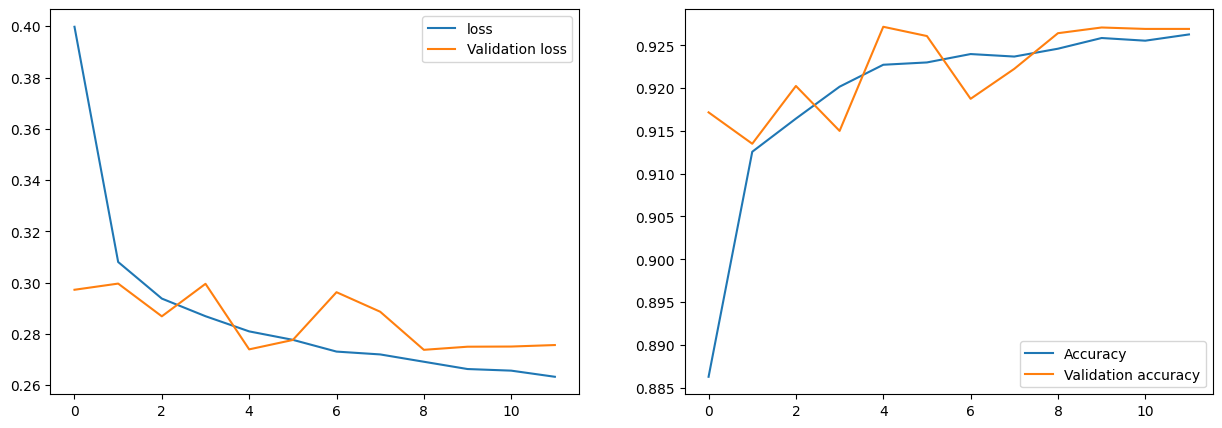

In [29]:
history.epoch
# plot loss and accuracy for training set
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(history.epoch, history.history['loss'], label='loss')
axs[0].plot(history.epoch, history.history['val_loss'], label='Validation loss')
axs[0].legend()
axs[1].plot(history.epoch, history.history['accuracy'], label='Accuracy')
axs[1].plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
axs[1].legend()
# plt.plot(history.epoch, history.history['loss'], label='loss')
# plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
plt.show()
# plt.legend()

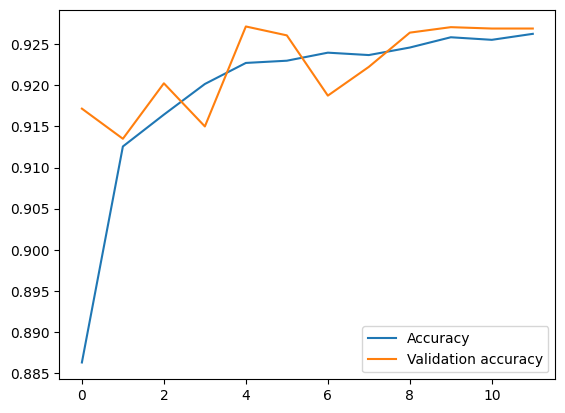

In [30]:
plt.plot(history.epoch, history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [31]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [32]:
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.2829815745353699
Test accuracy: 0.9206000566482544


In [33]:
modelRelu = keras.Sequential()
modelRelu.add(keras.layers.Dense(256, activation='relu', input_shape=(784,)))
modelRelu.add(keras.layers.Dense(10, activation='softmax'))
modelRelu.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [34]:
modelRelu.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
history = modelRelu.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
  6/375 [..............................] - ETA: 4s - loss: 1.6398 - accuracy: 0.5286  

2022-10-09 14:38:17.609112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 0.3172 - accuracy: 0.9098

2022-10-09 14:38:20.663724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 4s 9ms/step - loss: 0.3172 - accuracy: 0.9098 - val_loss: 0.1671 - val_accuracy: 0.9523
Epoch 2/12
375/375 [==============================] - 3s 8ms/step - loss: 0.1405 - accuracy: 0.9590 - val_loss: 0.1249 - val_accuracy: 0.9643
Epoch 3/12
375/375 [==============================] - 3s 9ms/step - loss: 0.0957 - accuracy: 0.9714 - val_loss: 0.1008 - val_accuracy: 0.9702
Epoch 4/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0711 - accuracy: 0.9799 - val_loss: 0.0903 - val_accuracy: 0.9728
Epoch 5/12
375/375 [==============================] - 3s 9ms/step - loss: 0.0562 - accuracy: 0.9839 - val_loss: 0.0898 - val_accuracy: 0.9737
Epoch 6/12
375/375 [==============================] - 4s 10ms/step - loss: 0.0445 - accuracy: 0.9871 - val_loss: 0.0881 - val_accuracy: 0.9727
Epoch 7/12
375/375 [==============================] - 4s 9ms/step - loss: 0.0357 - accuracy: 0.9899 - val_loss: 0.0831 - val_accuracy: 0.9757
Epoch 8/12
375/3

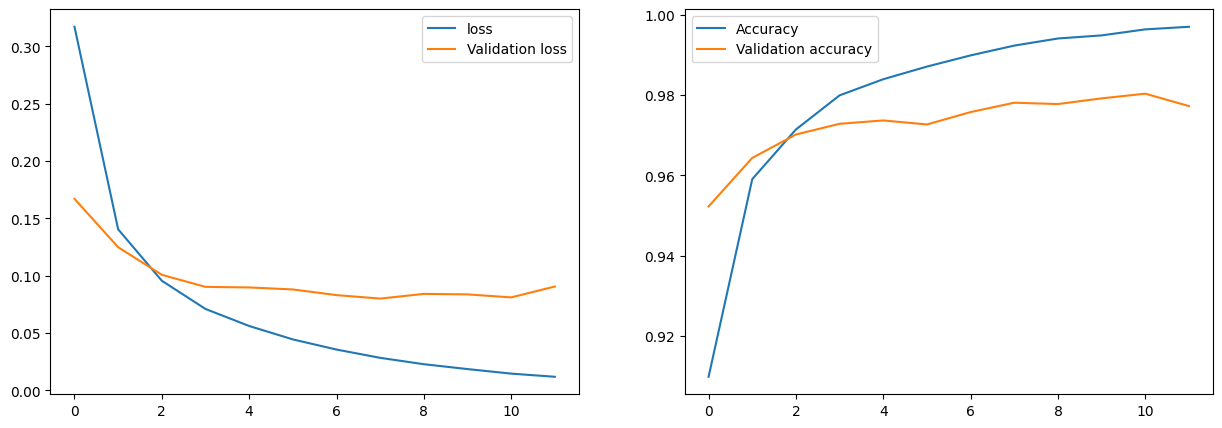

In [35]:
# history.epoch
# # plot loss and accuracy for training set
# plt.plot(history.epoch, history.history['loss'], label='loss')
# plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
# plt.legend()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(history.epoch, history.history['loss'], label='loss')
axs[0].plot(history.epoch, history.history['val_loss'], label='Validation loss')
axs[0].legend()
axs[1].plot(history.epoch, history.history['accuracy'], label='Accuracy')
axs[1].plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
axs[1].legend()
# plt.plot(history.epoch, history.history['loss'], label='loss')
# plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
plt.show()

In [36]:
# plt.plot(history.epoch, history.history['accuracy'], label='Accuracy')
# plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
# plt.legend()